# DAI-101 Assignment 1

**Objective**:Perform an explorative analysis of a dataset from Kaggle library.

### Title: Analysis of Student Performance related with multiple factors

We would be performing an <span style="color:#d29700"><b>analysis of student performance</b></span> along various dataset features. The dataset includes 10,000 records covering details about various features. The <span style="color:#f47171"><b>dataset</b></span> features includes:

- <span style="color:#3e9f56; font-weight:bold;">Student_ID</span> – Unique identifier for each student  
- <span style="color:#3e9f56; font-weight:bold;">Age</span> – Student's age (18-30 years)  
- <span style="color:#3e9f56; font-weight:bold;">Gender</span> – Male, Female, or Other  
- <span style="color:#3e9f56; font-weight:bold;">Study_Hours_per_Week</span> – Hours spent studying per week (5-50 hours)  
- <span style="color:#3e9f56; font-weight:bold;">Preferred_Learning_Style</span> – Visual, Auditory, Reading/Writing, Kinesthetic  
- <span style="color:#3e9f56; font-weight:bold;">Online_Courses_Completed</span> – Number of online courses completed (0-20)  
- <span style="color:#3e9f56; font-weight:bold;">Participation_in_Discussions</span> – Whether the student actively participates in discussions (Yes/No)  
- <span style="color:#3e9f56; font-weight:bold;">Assignment_Completion_Rate (%)</span> – Percentage of assignments completed (50%-100%)  
- <span style="color:#3e9f56; font-weight:bold;">Exam_Score (%)</span> – Student’s final exam score (40%-100%)  
- <span style="color:#3e9f56; font-weight:bold;">Attendance_Rate (%)</span> – Percentage of classes attended (50%-100%)  
- <span style="color:#3e9f56; font-weight:bold;">Use_of_Educational_Tech</span> – Whether the student uses educational technology (Yes/No)  
- <span style="color:#3e9f56; font-weight:bold;">Self_Reported_Stress_Level</span> – Student’s stress level (Low, Medium, High)  
- <span style="color:#3e9f56; font-weight:bold;">Time_Spent_on_Social_Media (hours/week)</span> – Weekly hours spent on social media (0-30 hours)  
- <span style="color:#3e9f56; font-weight:bold;">Sleep_Hours_per_Night</span> – Average sleep duration (4-10 hours)  
- <span style="color:#3e9f56; font-weight:bold;">Final_Grade</span> – Assigned grade based on exam score (A, B, C, D, F)  




### Importing Libraries & Loading Dataset

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


# Load the dataset into DataFrame
df = pd.read_csv("student_performance_large_dataset.csv")

# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

### Data Cleaning

In [13]:
# Check for missing values
df.isnull().sum()

Student_ID                                 0
Age                                        0
Gender                                     0
Study_Hours_per_Week                       0
Preferred_Learning_Style                   0
Online_Courses_Completed                   0
Participation_in_Discussions               0
Assignment_Completion_Rate (%)             0
Exam_Score (%)                             0
Attendance_Rate (%)                        0
Use_of_Educational_Tech                    0
Self_Reported_Stress_Level                 0
Time_Spent_on_Social_Media (hours/week)    0
Sleep_Hours_per_Night                      0
Final_Grade                                0
dtype: int64

In [14]:
# checking for duplicated values
df.duplicated().sum()

np.int64(0)

## 1. Univariate analysis



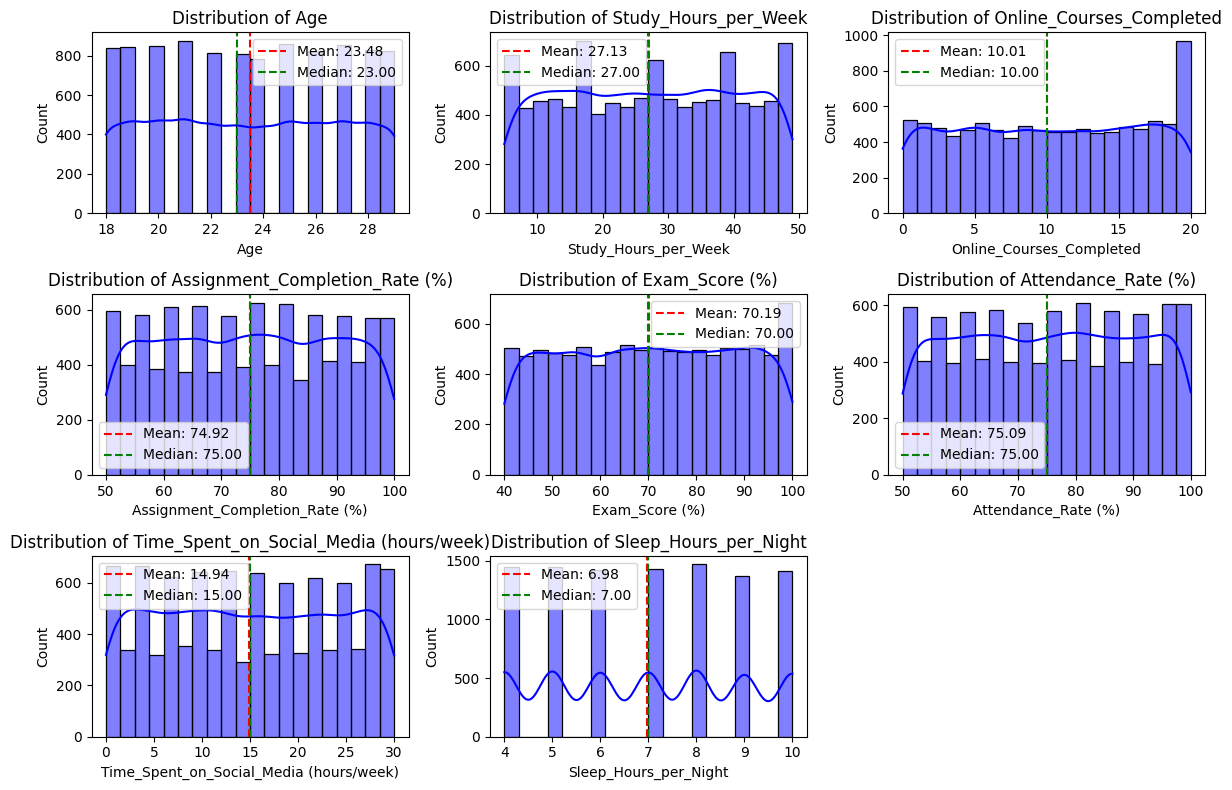

In [35]:
# List of numerical features
numerical_features = ['Age', 'Study_Hours_per_Week', 'Online_Courses_Completed', 
                      'Assignment_Completion_Rate (%)', 'Exam_Score (%)', 
                      'Attendance_Rate (%)', 'Time_Spent_on_Social_Media (hours/week)', 
                      'Sleep_Hours_per_Night']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=20, color="blue")
    
    # Calculate mean and median
    mean_value = df[feature].mean()
    median_value = df[feature].median()
    
    # Add vertical lines for mean and median
    plt.axvline(mean_value, color='red', linestyle='dashed', label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='green', linestyle='dashed', label=f'Median: {median_value:.2f}')
    
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()



### Observations

- <span style="color:#d29700; font-weight:bolder">Time spent on social media</span> and <span style="color:#d29700; font-weight:bolder">sleep hours per night</span> show <span style="color:red; font-weight:bolder">irregular</span> distributions, indicating diverse personal habits among students.
- The median and mean of <span style="color:#d29700; font-weight:bolder">sleep hours</span> are close to <span style="color:green; font-weight:bolder">7 hours</span>, suggesting that most students maintain a healthy sleep cycle.
- A significant proportion of students have achieved a <span style="color:#d29700; font-weight:bolder">perfect exam score (100%)</span>, highlighting potential <span style="color:red; font-weight:bolder">grade inflation</span> or <span style="color:red; font-weight:bolder">lenient assessments</span>.
- On average, students complete <span style="color:#d29700; font-weight:bolder">~10 online courses</span>, while a large proportion have completed <span style="color:#d29700; font-weight:bolder">20 courses</span>, suggesting <span style="color:green; font-weight:bolder">high engagement in online learning</span>.

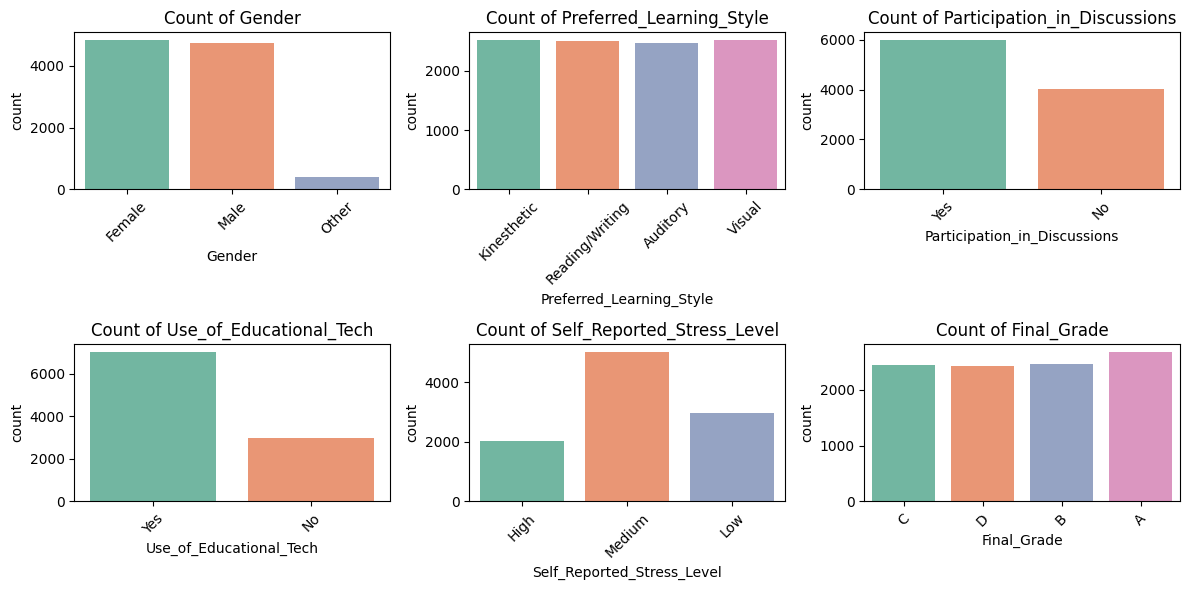

In [34]:
# List of categorical features
categorical_features = ['Gender', 'Preferred_Learning_Style', 'Participation_in_Discussions', 
                        'Use_of_Educational_Tech', 'Self_Reported_Stress_Level', 'Final_Grade']

# Plot count plots
plt.figure(figsize=(12, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[feature], palette='Set2')
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Observation

- There is a consistent ratio trend in <span style="color:#d29700; font-weight:bolder">preferred learning styles</span>, where each style has a similar number of students.
- A higher proportion of students actively participate in <span style="color:#d29700; font-weight:bolder">discussions</span> and utilize <span style="color:#d29700; font-weight:bolder">educational technology</span>, suggesting a positive engagement with learning resources.
- Approximately <span style="color:red; font-weight:bolder">2,000 students</span> report experiencing high stress, while a significant majority fall under <span style="color:#d29700; font-weight:bolder">medium stress levels</span>, indicating widespread academic pressure.
- The <span style="color:#d29700; font-weight:bolder">final grade distribution</span> follows a consistent pattern, with a slightly higher count of <span style="color:green; font-weight:bolder">A grades</span>, suggesting strong academic performance among students.


## 2. Multivariate Analysis

Correlation between Numerical Features

In [39]:
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['number'])  

# Compute correlation
correlation_matrix = numeric_df.corr()
correlation_matrix


,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
Age,1.000000,-0.002108,-0.004895,-0.006275,0.001693,-0.014050,0.012660,0.012052
Study_Hours_per_Week,-0.002108,1.000000,0.025951,0.000894,0.004084,0.007768,0.010380,0.010908
Online_Courses_Completed,-0.004895,0.025951,1.000000,-0.000654,0.002070,0.001067,0.002619,-0.008139
Assignment_Completion_Rate (%),-0.006275,0.000894,-0.000654,1.000000,0.010470,0.000026,0.007933,0.009544
Exam_Score (%),0.001693,0.004084,0.002070,0.010470,1.000000,0.003717,0.000818,-0.016284
Attendance_Rate (%),-0.014050,0.007768,0.001067,0.000026,0.003717,1.000000,-0.013386,-0.005105
Time_Spent_on_Social_Media (hours/week),0.012660,0.010380,0.002619,0.007933,0.000818,-0.013386,1.000000,-0.001699
Sleep_Hours_per_Night,0.012052,0.010908,-0.008139,0.009544,-0.016284,-0.005105,-0.001699,1.000000


### Observations

- The <span style="color:#d29700; font-weight:bolder">Exam Score</span> has the highest positive correlation with <span style="color:#d29700; font-weight:bolder">Assignment Completion Rate</span>, indicating that students who complete more assignments tend to score higher in exams.
- The lowest correlation with <span style="color:#d29700; font-weight:bolder">Exam Score</span> is observed with <span style="color:#d29700; font-weight:bolder">Sleep Hours per Night</span>, showing a <span style="color:red; font-weight:bolder">negative correlation</span>, which suggests that increased sleep hours may be linked to slightly lower exam scores.
- <span style="color:#d29700; font-weight:bolder">Age</span> has a higher correlation with both <span style="color:#d29700; font-weight:bolder">Sleep Hours</span> and <span style="color:#d29700; font-weight:bolder">Time Spent on Social Media</span> compared to other features, indicating that older students may have different sleep patterns and social media usage habits than younger students.

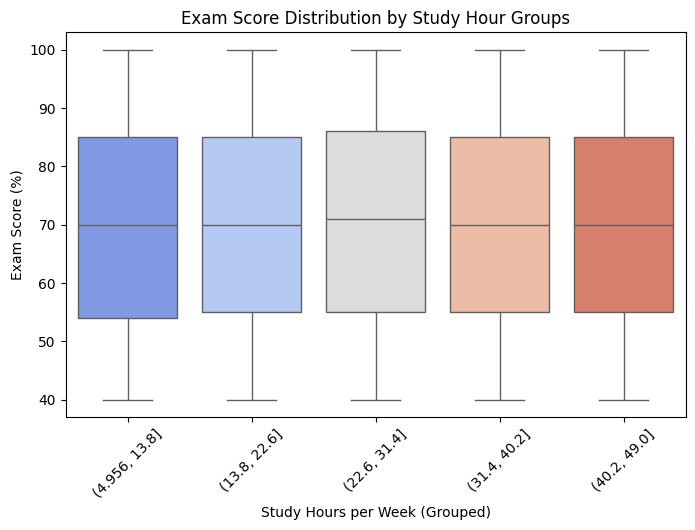

In [56]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.cut(df['Study_Hours_per_Week'], bins=5), y=df['Exam_Score (%)'], palette="coolwarm")

plt.xticks(rotation=45)
plt.title("Exam Score Distribution by Study Hour Groups")
plt.xlabel("Study Hours per Week (Grouped)")
plt.ylabel("Exam Score (%)")
plt.show()


### Observations

- A notable observation is that each study hour group has outliers at both <span style="color:#d29700; font-weight:bolder">100%</span> and <span style="color:#d29700; font-weight:bolder">40%</span>, indicating that some students excel or struggle regardless of study hours.
- Interestingly, regardless of study hours, students tend to have a consistent mean score of around <span style="color:green; font-weight:bolder">70%</span>, suggesting a stable performance trend.
- Across all study hour groups, the Q1–Q3 quartile range falls within <span style="color:red; font-weight:bolder">55%</span> to <span style="color:red; font-weight:bolder">85%</span>, showing a similar spread in performance.

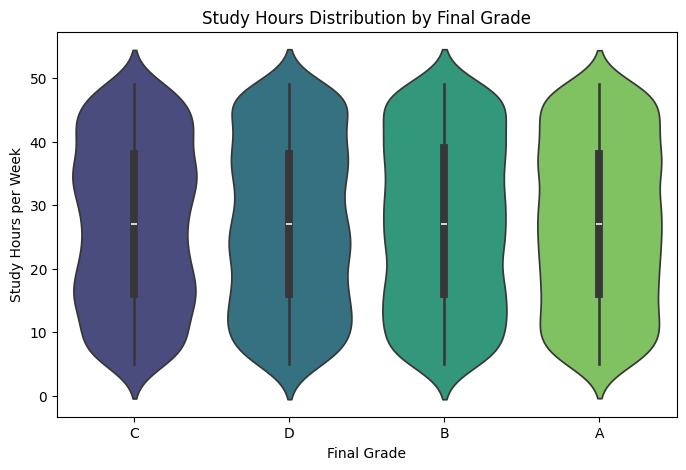

In [63]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=df['Final_Grade'], y=df['Study_Hours_per_Week'], palette='viridis')

plt.title("Study Hours Distribution by Final Grade")
plt.xlabel("Final Grade")
plt.ylabel("Study Hours per Week")
plt.show()


### Observation

- Again observation is that irrespective of<span style="color:#d29700; font-weight:bolder"> study hours</span>, <span style="color:#d29700; font-weight:bolder"> grades</span> see a consistent pattern.

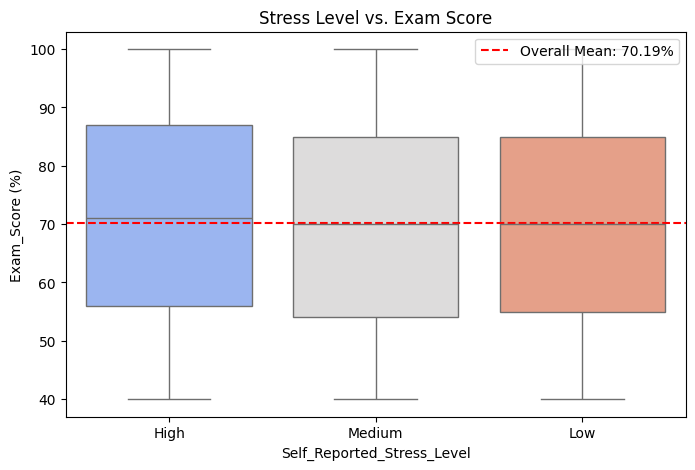

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Self_Reported_Stress_Level'], y=df['Exam_Score (%)'], palette='coolwarm')

# Mean exam score annotation
mean_exam_score = df['Exam_Score (%)'].mean()
plt.axhline(mean_exam_score, color='red', linestyle='dashed', label=f'Overall Mean: {mean_exam_score:.2f}%')

plt.title('Stress Level vs. Exam Score')
plt.legend()
plt.show()


### Observation

- Regardless of stress levels, students are seen scoring <span style="color:#d29700; font-weight:bolder">100%</span> and <span style="color:#d29700; font-weight:bolder">40%</span> in all categories. However, it is <span style="color:red; font-weight:bolder">unusual</span> to observe that students in <span style="color:green; font-weight:bolder">higher stress levels</span> tend to score better, whereas students in <span style="color:red; font-weight:bolder">medium stress</span> score lower, and those in <span style="color:red; font-weight:bolder">low stress</span> perform the worst.
- The group with <span style="color:green; font-weight:bolder">higher stress</span> has a mean score that is higher than the overall mean, suggesting a possible link between stress and academic performance.

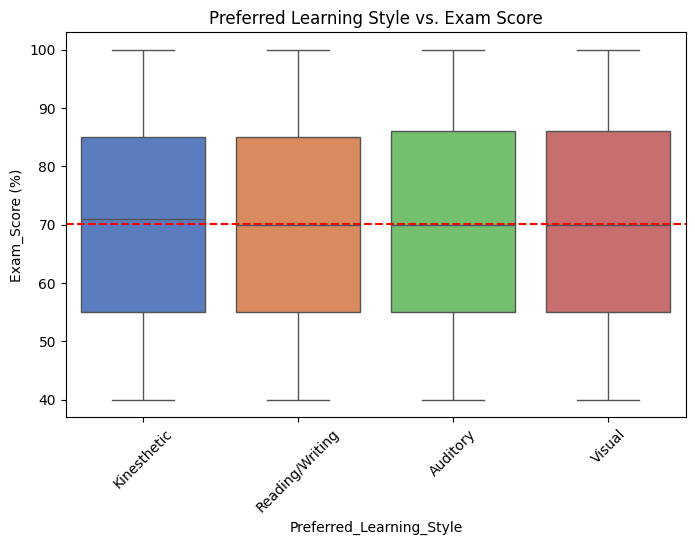

In [64]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Preferred_Learning_Style'], y=df['Exam_Score (%)'], palette='muted')
plt.xticks(rotation=45)
plt.axhline(mean_exam_score, color='red', linestyle='dashed', label=f'Overall Mean: {mean_exam_score:.2f}%')

plt.title('Preferred Learning Style vs. Exam Score')
plt.show()


### Observation

- Once again, almost all <span style="color:#d29700; font-weight:bolder">preferred learning styles</span> have outliers at <span style="color:#d29700; font-weight:bolder">100%</span> and <span style="color:#d29700; font-weight:bolder">40%</span>, indicating that students across different learning styles can achieve both extreme scores.
- Students with a <span style="color:green; font-weight:bolder">kinesthetic learning style</span> tend to have a higher mean exam score compared to others, while those with a <span style="color:red; font-weight:bolder">visual learning style</span> score slightly below the overall average.

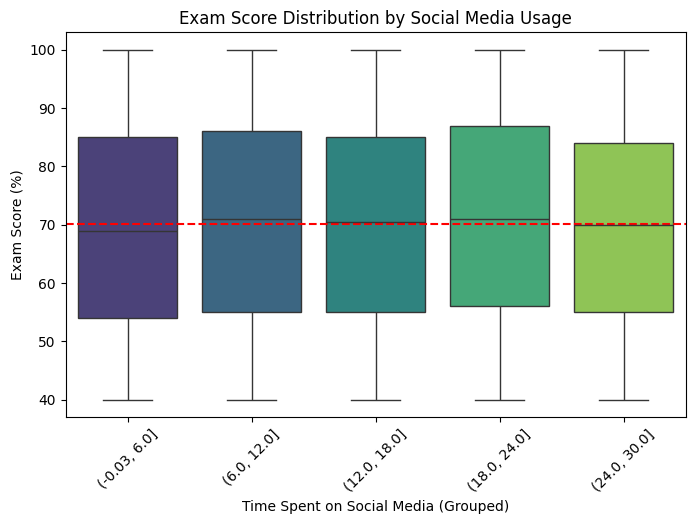

In [68]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.cut(df['Time_Spent_on_Social_Media (hours/week)'], bins=5), y=df['Exam_Score (%)'], palette='viridis')

plt.xticks(rotation=45)
plt.axhline(mean_exam_score, color='red', linestyle='dashed', label=f'Overall Mean: {mean_exam_score:.2f}%')

plt.xlabel('Time Spent on Social Media (Grouped)')
plt.ylabel('Exam Score (%)')
plt.title("Exam Score Distribution by Social Media Usage")
plt.show()


### Observation

- It is <span style="color:red; font-weight:bolder">unusual</span> that students with <span style="color:#d29700; font-weight:bolder">lower social media usage</span> tend to have a lower average exam score compared to others.
- Interestingly, students with <span style="color:#d29700; font-weight:bolder">extremely high social media usage</span> still maintain decent averages, but about <span style="color:red; font-weight:bolder">75%</span> of them score below or equal to <span style="color:#d29700; font-weight:bolder">85%</span>, which is lower than other groups.
- The <span style="color:green; font-weight:bolder">optimal social media usage range</span> appears to be around 18-24 hours per week, as Q3 (upper quartile) starts at a higher score than other groups. Additionally, the mean score for this group is higher than both the overall mean and the other categories.

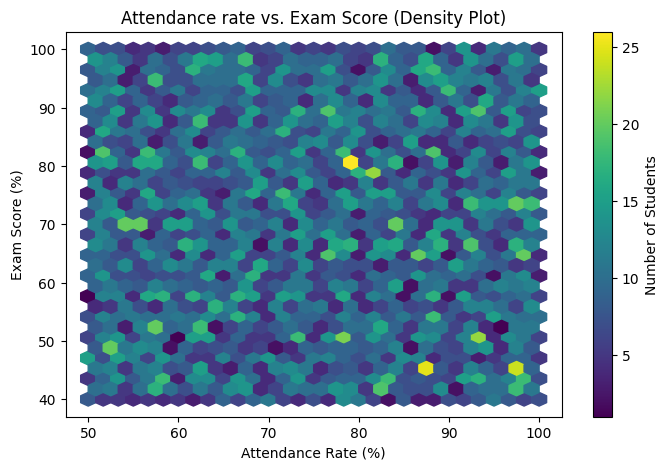

In [72]:
plt.figure(figsize=(8, 5))
plt.hexbin(df['Attendance_Rate (%)'], df['Exam_Score (%)'], gridsize=30, cmap='viridis', mincnt=1)

plt.colorbar(label='Number of Students')
plt.xlabel('Attendance Rate (%)')
plt.ylabel('Exam Score (%)')
plt.title("Attendance rate vs. Exam Score (Density Plot)")
plt.show()


### Observations

- <span style="color:#d29700; font-weight:bolder">No strong linear relationship</span> is observed between attendance rate and exam scores, as the data points are widely scattered across different attendance levels.
- The <span style="color:green; font-weight:bolder">highest density</span> of students falls within the 65%-85% exam score range, irrespective of attendance rate.
- A few <span style="color:red; font-weight:bolder">high-density spots</span> (bright yellow) appear around higher attendance rates (~80-100%), but similar patterns exist at lower attendance too.
- Students with both high and low attendance rates are found across all score ranges, including 100% and 40% scores, suggesting that attendance alone is not a sole factor influencing performance.

## Data Overview & Summary Statistics

In [73]:
# Display basic statistics
df.describe()


,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,10.007900,74.922000,70.188900,75.085100,14.936500,6.979300
std,3.461986,13.002547,6.136726,14.675437,17.649447,14.749251,9.022639,1.996965
min,18.000000,5.000000,0.000000,50.000000,40.000000,50.000000,0.000000,4.000000
25%,20.000000,16.000000,5.000000,62.000000,55.000000,62.000000,7.000000,5.000000
50%,23.000000,27.000000,10.000000,75.000000,70.000000,75.000000,15.000000,7.000000
75%,27.000000,38.000000,15.000000,88.000000,85.000000,88.000000,23.000000,9.000000
max,29.000000,49.000000,20.000000,100.000000,100.000000,100.000000,30.000000,10.000000


## **Overall Conclusion from EDA Report**  

After conducting an extensive **Exploratory Data Analysis (EDA)** on student performance, several key insights emerged regarding **factors influencing exam scores and final grades**.  

---

### **Key Findings**  

🔹 **<span style="color:#d29700; font-weight:bolder">Study Habits & Performance</span>**  
- **Study hours** do not show a **strong linear relationship** with **exam scores**.  
- Every **study hour group** contains **outliers** at both **<span style="color:red; font-weight:bolder">100%</span> and <span style="color:red; font-weight:bolder">40%</span>**, indicating **other factors impact performance**.  
- Most students score between **<span style="color:green; font-weight:bolder">55%-85%</span>**, regardless of study time.  

🔹 **<span style="color:#d29700; font-weight:bolder">Attendance & Performance</span>**  
- **Higher attendance rates** do **not always translate** to **higher exam scores**.  
- Exam performance is **widely distributed** across attendance levels, showing that **attendance alone isn’t a determining factor**.  

🔹 **<span style="color:#d29700; font-weight:bolder">Learning Styles & Performance</span>**  
- All **preferred learning styles** have **outliers** at **<span style="color:red; font-weight:bolder">100%</span> and <span style="color:red; font-weight:bolder">40%</span>**.  
- **Kinesthetic learners** tend to have a **higher mean exam score**, while **visual learners** score **slightly below average**.  

🔹 **<span style="color:#d29700; font-weight:bolder">Social Media & Performance</span>**  
- **No clear correlation** exists between **social media usage** and **exam scores**.  
- The **sweet spot** for balanced **social media usage** is around **<span style="color:green; font-weight:bolder">18-24 hours per week</span>**, where students tend to perform better.  

🔹 **<span style="color:#d29700; font-weight:bolder">Stress Levels & Performance</span>**  
- Students from **all stress levels** are found scoring both **<span style="color:red; font-weight:bolder">100%</span> and <span style="color:red; font-weight:bolder">40%</span>**.  
- Surprisingly, **higher-stress students** tend to have a **higher mean exam score** than others.  

🔹 **<span style="color:#d29700; font-weight:bolder">General Score Distribution</span>**  
- Most students fall within **<span style="color:green; font-weight:bolder">45%-95%</span>** marks range.  
- A **high number of students achieve <span style="color:red; font-weight:bolder">100%</span>**, suggesting **potential grade inflation or easier exams**.  

---

### **Final Takeaways**  

- **<span style="color:#d29700; font-weight:bolder">Exam scores and final grades</span>** are influenced by **multiple factors**, not just **study hours or attendance**.  
- **<span style="color:#d29700; font-weight:bolder">Social media and stress</span>** do not **directly impact performance**, but **moderate usage or manageable stress** may help.  
- **<span style="color:#d29700; font-weight:bolder">Students with different learning styles</span>** perform variably, with **kinesthetic learners showing slightly better results**.  
- The dataset shows an **unusual trend** where a **high number of students score <span style="color:red; font-weight:bolder">100%</span>**, indicating a **need to investigate grading policies**.  

---
